<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW5/FittingTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [142]:
def line(x,b,m):
  return b + m*x

In [156]:
def plot_line(data, data_range):
  df = data.iloc[data_range]

  x = df.x.values
  ones = np.ones(len(x))
  A = np.column_stack((ones,x))

  Y = (np.array(df.y.values)).reshape(-1,1)
  C = np.diag(df.sigmay.values**2)
  X = np.dot(np.linalg.inv(np.dot(A.T, np.dot(np.linalg.inv(C), A))), np.dot(A.T, np.dot(np.linalg.inv(C), Y)))
  Covariance = np.linalg.inv(np.dot(A.T, np.dot(np.linalg.inv(C), A)))

  xx = np.linspace(0,300,20)
  text_label = "$y = ({:.2f} \pm {:.2f})x + ({:.0f} \pm {:.0f})$".format(X[1][0],np.sqrt(Covariance[1][1]), X[0][0],np.sqrt(Covariance[0][0]))
  fig,axes = plt.subplots(figsize=(6,6))

  axes.errorbar(df.x, df.y, yerr=df.sigmay, linestyle='', marker='o', capsize=3, color='black')
  axes.plot(xx, line(xx, b = X[0][0], m = X[1][0]), color='black')
  axes.text(100,100, s = text_label, fontsize=11, fontweight='bold')
  axes.text(50,50, s = "Standard uncertainty variance on m = {:.3f}".format(Covariance[1][1]), fontsize=10, fontweight='bold')
  plt.xlim(0,300)
  plt.ylim(0,700)
  plt.xlabel('x')
  plt.ylabel('y')


In [157]:
df_data = pd.read_csv('https://raw.githubusercontent.com/skumarudel/DSPS_SKumar/master/HW5/hbl2017.csv', comment='#', sep=',', header=None, names=['ID', 'x', 'y', 'sigmay', 'sigmax', 'rhoxy'])

#Excercise 1     [Reference Paper](https://cosmo.nyu.edu/hogg/research/2010/08/17/straightline.pdf)

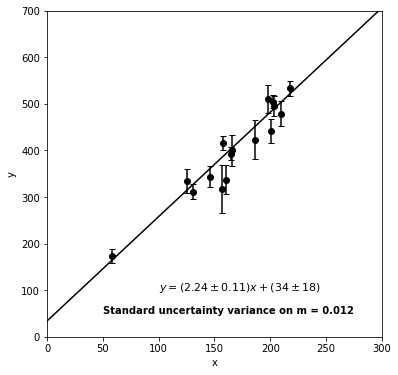

In [158]:
plot_line(data=df_data, data_range=range(4,20))

#Excercise 2     [Reference Paper](https://cosmo.nyu.edu/hogg/research/2010/08/17/straightline.pdf)

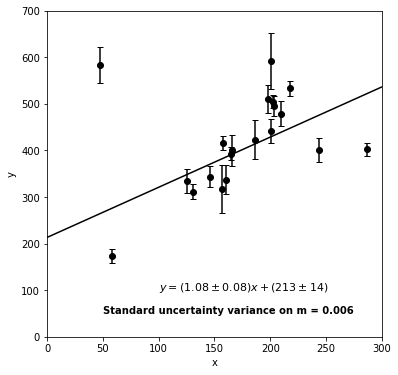

In [159]:
plot_line(data=df_data, data_range=range(0,20))